# TASK 1: Prediction using Supervised ML


# Objective:

To predict the percentage of a student based on the number of study hours.

### Simple linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Author: Nishant Kumar**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading given dataset
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


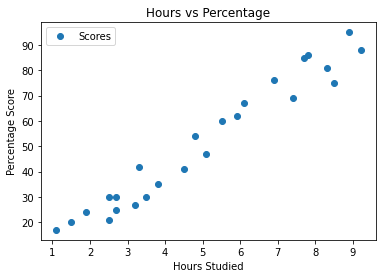

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Now we have to visualize the linear regression 

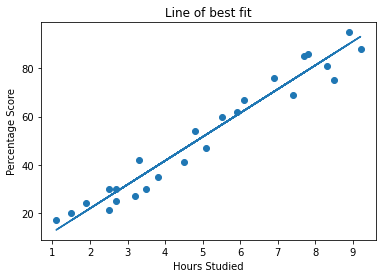

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.title("Line of best fit")
plt.show()

In [12]:
#to get the intercept and coefficient of regression
print("Intercept:")
print(regressor.intercept_)
print("coefficient:")
print(regressor.coef_)

Intercept:
2.018160041434683
coefficient:
[9.91065648]


The above value concludes that if a student studies one hour more than that of previously studied hours , he can expect an increase of 9.91% in the score.



### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicted score of a student who studies for 9.25 hrs/day:

In [16]:
# You can also test with your own data
hours = 9.25
array=np.array(hours)
hours=array.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating algorithm

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean squared Error: 21.5987693072174
Root mean Squared Error: 4.6474476121003665


### End of Task 1